In [196]:
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.metrics import accuracy_score 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import numpy.random as r 
import matplotlib.pyplot as plt 
import cv2

import glob
import matplotlib.gridspec as gridspec #A grid layout to place subplots within a figure.
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

%matplotlib inline 
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn #for visualization

In [197]:
license_plate = glob.glob("test_lps/3P8757M/*.jpg")
print(license_plate)

['test_lps/3P8757M/M.jpg', 'test_lps/3P8757M/8.jpg', 'test_lps/3P8757M/7_1.jpg', 'test_lps/3P8757M/5.jpg', 'test_lps/3P8757M/7.jpg', 'test_lps/3P8757M/3.jpg', 'test_lps/3P8757M/P.jpg']


In [198]:
cols=3
rows=2
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({"font.size":14})
grid = gridspec.GridSpec(ncols=cols,nrows=rows,figure=fig)
print(len(license_plate))

7


<Figure size 576x576 with 0 Axes>

M
8
7
5
7
3
P


<ipython-input-340-ca665ddc6f2b>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(grid[i])


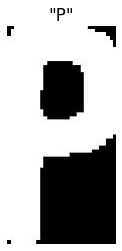

In [340]:
for i in range(len(license_plate)):
    fig.add_subplot(grid[i])
    image = load_img(license_plate[i])
    #image = cv2.imread(license_plate[i])
    
    label = license_plate[i].split("/")[2][0]
    print(label)
    plt.title('"{:s}"'.format(label))
    plt.axis(False)
    plt.imshow(image)

test_lps/3P8757M/M.jpg
test_lps/3P8757M/8.jpg
test_lps/3P8757M/7_1.jpg
test_lps/3P8757M/5.jpg
test_lps/3P8757M/7.jpg
test_lps/3P8757M/3.jpg
test_lps/3P8757M/P.jpg
(28, 28)
784
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 255. 255. 255. 255. 255.   0.   0.   0.   0.
    0.   0.   0. 255. 255. 255. 255. 255.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 254.   0.   0.   0.
    0.   0. 254. 255. 255. 255. 255. 255.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0. 255. 255. 255. 255. 255. 255. 255.   0.   0.
    0.   5. 250. 255. 255. 

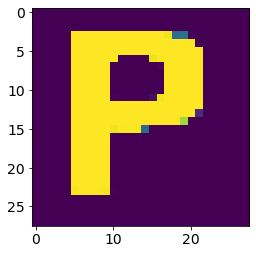

In [341]:
X=[]
labels =[]

for image_path in license_plate:
    print(image_path)
    image = cv2.imread(image_path, 0) #0 = grayscale
    
    PADDING = [0,0,0]
    PAD = 30
    image= cv2.copyMakeBorder(image,PAD,PAD+10,PAD,PAD+10,cv2.BORDER_CONSTANT,value=PADDING)         
    image = cv2.resize(image, (28, 28))
    plt.imshow(image)
    #print(image)
    X.append(image)
    label = image_path.split("/")[2][0]
    labels.append(label)

    
print(image.shape)
print(image.size)
 
X_test = np.array(X, dtype = "float")
print(X_test[0])
print(X_test[1])
print(X_test[2])

#print(X_test[6-2])

In [342]:
y_test = np.array(labels)
print(y_test.shape)

(7,)


## CHARACTERS

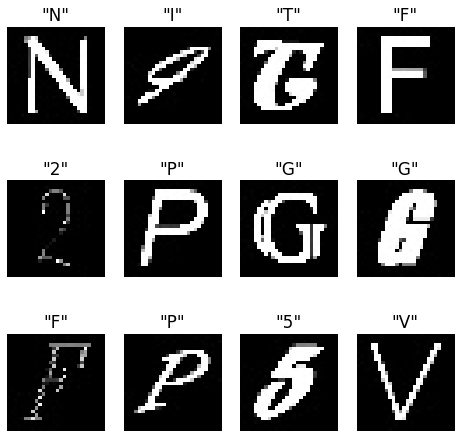

In [343]:
characters = glob.glob("dataset_characters/**/*.jpg")
cols=4
rows=3
fig = plt.figure(figsize=(8,8))
plt.rcParams.update({"font.size":14})
grid = gridspec.GridSpec(ncols=cols,nrows=rows,figure=fig)

# create a random list of images will be displayed
np.random.seed(45)
rand = np.random.randint(0,len(characters),size=(cols*rows))

# Plot example images
for i in range(cols*rows):
    fig.add_subplot(grid[i])
    image = load_img(characters[rand[i]])
    label = characters[rand[i]].split(os.path.sep)[-2]
    plt.title('"{:s}"'.format(label))
    plt.axis(False)
    plt.imshow(image)

In [344]:
X=[]
labels_train =[]

for image_path in characters:
    image = cv2.imread(image_path, 0) #0 = grayscale
    image = cv2.resize(image, (28, 28)) 
    X.append(image)
    label = image_path.split(os.path.sep)[-2]
    labels_train.append(label)

    
print(image.shape)
print(image.size)
 
X = np.array(X, dtype = "float")
print(X[10000])

(28, 28)
784
[[  2.   0.   0.   1.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   3.   0.   0.   2.   1.   0.   2.   0.   0.   0.   0.]
 [  0.   5.   0.   0.   2.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   3.   0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   3.   0.   0.   1.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   1.   0.   2.   3.   0.   1.   4.   0.   0.   0.   0.   0.]
 [  2.   0.   0.   0.   0.   5.   0. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 252. 252. 255. 253.   0.   0.   0.   0.   0.   0.]
 [  1.   1.   1.   1.   2.   0.   0. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 254. 255. 255. 255. 253. 255.   2.   3.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   4. 254. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 252. 253. 255.   0.   0.   0.   0.   0.   0.]
 [  1.   2.   2.   0.   0.   2.   0.   1.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   1. 255. 255. 255.  41.   0

In [345]:
y = np.array(labels_train)
print(y.shape)

(37623,)


In [346]:
X_train, x_ , y_train, y_ = train_test_split(X, y, test_size = 0.90, random_state = 42)

In [347]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3762, 28, 28)
(7, 28, 28)
(3762,)
(7,)


In [348]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(penalty= "l2", C = 10) 

In [354]:
num_pixels = 784 #28*28
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

print(X_test)
print(y_test)

(3762, 784)
(7, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['M' '8' '7' '5' '7' '3' 'P']


In [350]:
model.fit(X_train, y_train)

/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [351]:
model.score(X_test, y_test)#how good the model is 

0.8571428571428571

In [352]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [353]:
print(metrics.classification_report(y_test, y_predicted)) 

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         1
           M       1.00      1.00      1.00         1
           P       1.00      1.00      1.00         1
           R       0.00      0.00      0.00         0

    accuracy                           0.86         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.86      0.86      0.86         7



/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liner1/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/liner1/opt/anacon